Alexnet -> stack the convolutional

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [10]:
test_labels.max()

9

In [4]:
CLASS_NAMES = ['airplane','automobile','bird','cat','deer','dog','frog',
               'horse','ship','truck']

# slices the dataset

In [11]:
train_ds= tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

# Preprocessing



tf.Tensor([6], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)
tf.Tensor([4], shape=(1,), dtype=uint8)
tf.Tensor([1], shape=(1,), dtype=uint8)
tf.Tensor([1], shape=(1,), dtype=uint8)
tf.Tensor([2], shape=(1,), dtype=uint8)
tf.Tensor([7], shape=(1,), dtype=uint8)
tf.Tensor([8], shape=(1,), dtype=uint8)
tf.Tensor([3], shape=(1,), dtype=uint8)
tf.Tensor([4], shape=(1,), dtype=uint8)
tf.Tensor([7], shape=(1,), dtype=uint8)
tf.Tensor([7], shape=(1,), dtype=uint8)
tf.Tensor([2], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)
tf.Tensor([3], shape=(1,), dtype=uint8)
tf.Tensor([2], shape=(1,), dtype=uint8)
tf.Tensor([6], shape=(1,), dtype=uint8)


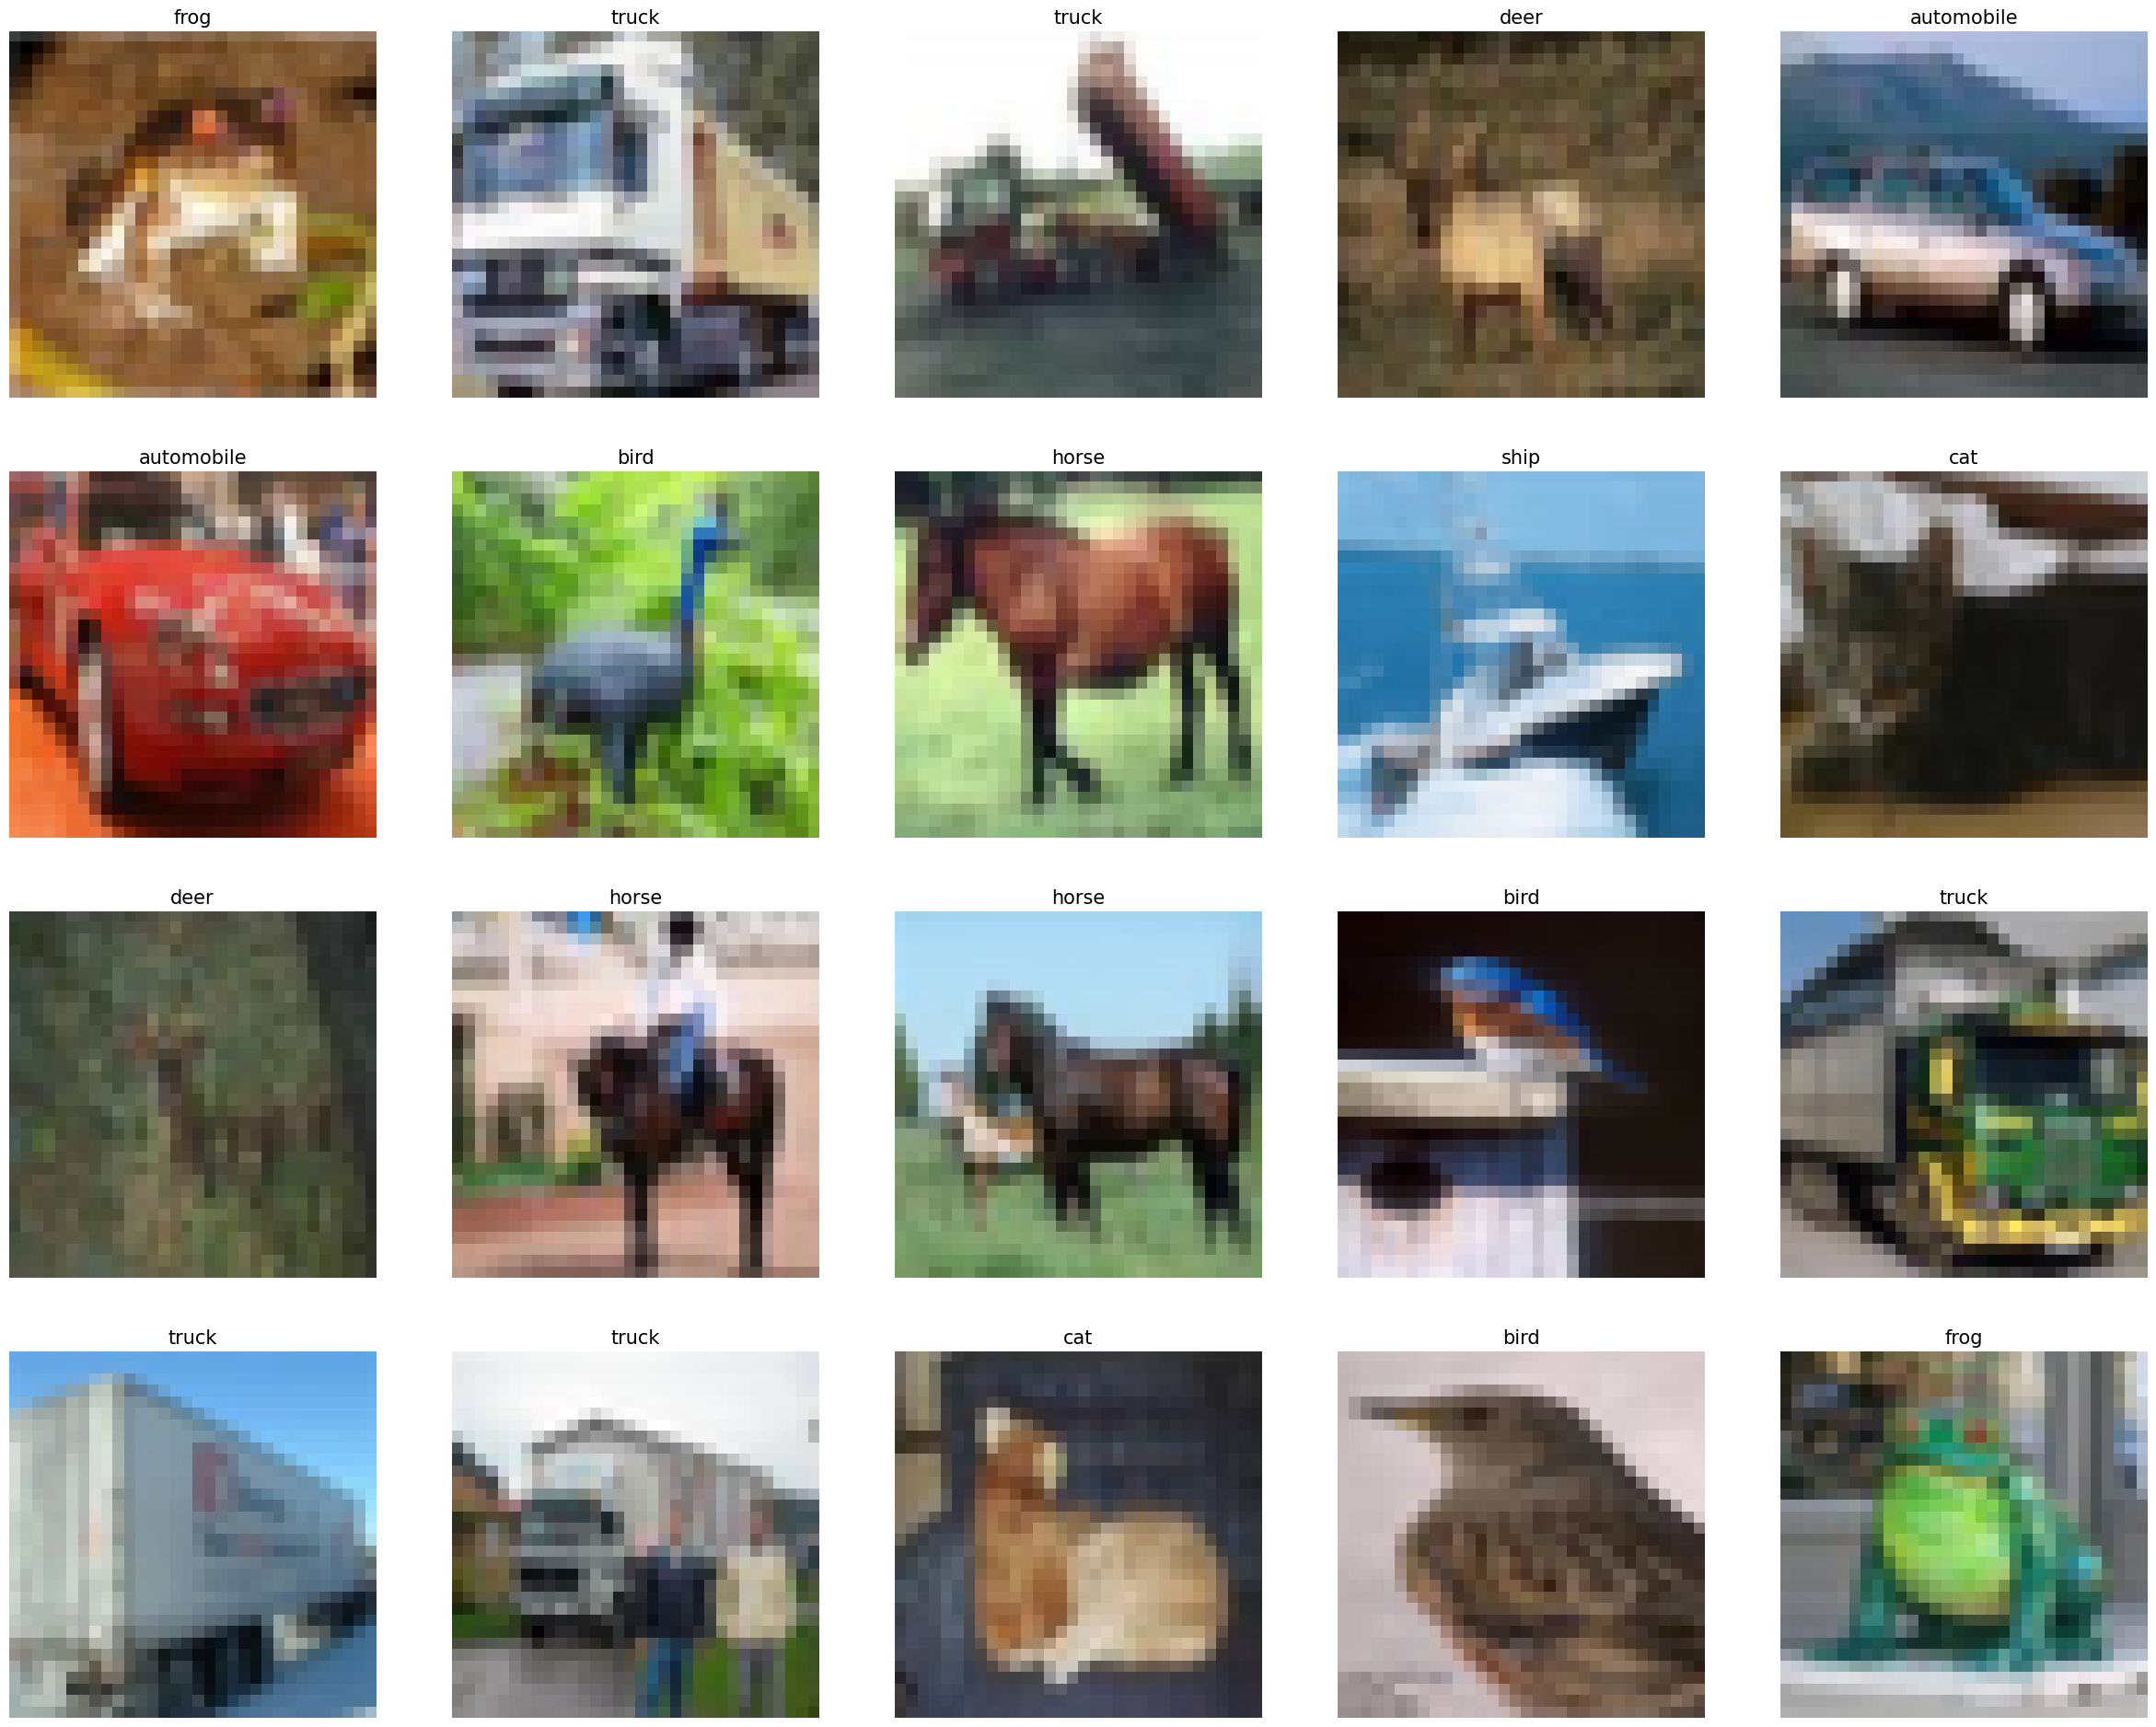

In [13]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]],fontsize=15)
    plt.axis('off')

# Process images
perform all preprocessing work that we require for the data

In [14]:
def process_image(image,label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image,(64,64))
    
    return image

# Pipline data


In [15]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy() # mencari data yang tidak duplicate
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print("train size ",train_ds_size)
print("test size ",test_ds_size)

train size  50000
test size  10000


# For our basic input/data pipeline, we will conduct three primary operations:

1. Preprocessing the data within the dataset
2. Shuffle the dataset
3. Batch data within the dataset